Задача 1

Объясняемая переменная y зависит от двух категориальных факторов A и B, причём фактор A имеет 3 уровня, а фактор B - 4 уровня. Результаты наблюдений приведены в таблице:

С помощью двухфакторного дисперсионного анализа проверьте влияние каждого из факторов на переменную y.

In [3]:
import numpy as np

m = 3
k = 4

y = [[2.68, 3.29, 2.88, 4.45],
     [4.12, 4.96, 5.09, 5.22],
     [5.52, 4.50, 5.42, 5.29]]

y = np.array(y)

ssa = k * ((y[0, :].mean() - y.mean())**2 + (y[1, :].mean() - y.mean())**2 + (y[2, :].mean() - y.mean())**2).sum()
ssb = m * ((y[:, 0].mean() - y.mean())**2 + (y[:, 1].mean() - y.mean())**2 + (y[:, 2].mean() - y.mean())**2 + (y[:, 3].mean() - y.mean())**2).sum()

ssw = 0

for i in range(3):
    for j in range(4):
        ssw += (y[i, j] - y[i, :].mean() - y[:, j].mean() + y.mean())**2
        
Fa = ssa**2*(k-1)/ssw**2
Fb = ssb**2*(m-1)/ssw**2


In [27]:
from scipy import stats

n = k*m

k1a = m - 1
k2a = n - m

alpha = 0.05

ta = stats.f.ppf(1 - alpha, k1a, k2a)
print(f'Статистика Fa = {Fa} попала в критическую область ({ta}, +∞). Результат - не случайность при уровне значимости в 0.05.')

k1b = k - 1
k2b = n - k

alpha = 0.05

tb = stats.f.ppf(1 - alpha, k1b, k2b)
print(f'Статистика Fb = {Fb} не попала в критическую область ({tb}, +∞). Результат - случайность при уровне значимости в 0.05.')

Статистика Fa = 49.51886301953694 попала в критическую область (4.25649472909375, +∞). Результат - не случайность при уровне значимости в 0.05.
Статистика Fb = 0.9615863719464893 не попала в критическую область (4.06618055135116, +∞). Результат - случайность при уровне значимости в 0.05.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use('bmh')

In [5]:
SP = pd.read_csv('SnP500.csv').dropna()
RU = pd.read_csv('RUT.csv').dropna()
TR = pd.read_csv('TREAST.csv')
VI = pd.read_csv('VIX.csv')

In [6]:
SP = SP[SP.Date > '2000-12-31']
SP['med'] = (SP.Open + SP.Close)/2

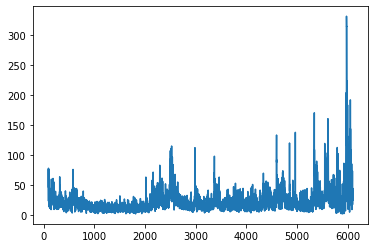

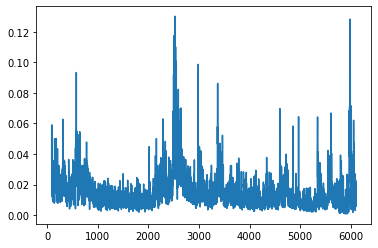

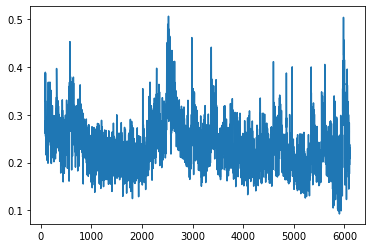

In [7]:
plt.plot(SP.High - SP.Low)
plt.show()
p = ((SP.High - SP.Low)/SP.med)
plt.plot(p)
plt.show()
pm = ((SP.High - SP.Low)/SP.med)**(1/3)
plt.plot(pm)
plt.show()

In [8]:
SP.describe()

,Open,High,Low,Close,Adj Close,Volume,med
count,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4.980000e+03,4980.000000
mean,1638.568072,1650.103669,1626.510291,1639.306889,1639.306889,1.369870e+06,1638.937481
std,655.292954,658.520350,652.301876,656.086348,656.086348,8.482371e+05,655.615776
min,674.750000,694.750000,665.750000,676.000000,676.000000,0.000000e+00,682.375000
25%,1146.937500,1158.437500,1137.750000,1148.187500,1148.187500,7.247290e+05,1146.687500
50%,1359.875000,1370.500000,1350.375000,1359.750000,1359.750000,1.284896e+06,1359.750000
75%,2073.000000,2082.500000,2060.562500,2074.250000,2074.250000,1.844430e+06,2072.312500
max,3391.750000,3397.500000,3382.000000,3387.750000,3387.750000,6.659472e+06,3385.000000


In [9]:
pm = pm.reset_index(drop=True)
SP.reset_index(drop=True, inplace=True)

In [6]:
win = 200

for i in range(0, len(p), 15):
    arr = []
    arr.append(pm[i:i+win])
    fig, ax = plt.subplots(nrows=2, ncols=1)
    fig.set_size_inches(10, 10)
    fig.subplots_adjust(wspace=0.3)
    fig.subplots_adjust(hspace=0.3)
    ax1, ax2 = ax.flatten()
    ax1.hist(arr, bins=15)
    ax1.set_xlim([0.05, 0.55])
    ax1.set_ylim([0, 65])
    ax2.plot(SP.med, color='g')
    ax2.plot(SP.med[i:i+win], color='r')
    ax2.set_ylim([600, 3500])
    ax2.set_xlim([0, 5000])
    plt.title(f'{SP.Date[SP.index[i]]}')
    plt.savefig(f'D:/Temp/hist/{SP.Date[SP.index[i]]}.png')
    plt.clf()
    #plt.show()

d:\temp\python\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [61]:
SPV = pd.DataFrame(SP[['Date', 'Volume']])
SPV = SPV.set_index('Date')
SPV.index = pd.to_datetime(SPV.index)
TRV = TR.set_index('DATE')
TRV.index = pd.to_datetime(TRV.index)

In [62]:
SPVTRV = SPV[SPV.index > '2002-12-17'].join(TRV)
SPVTRV.TREAST = SPVTRV.TREAST.fillna(method='ffill')
corr = SPVTRV.Volume.rolling(window=100).corr(SPVTRV.TREAST)

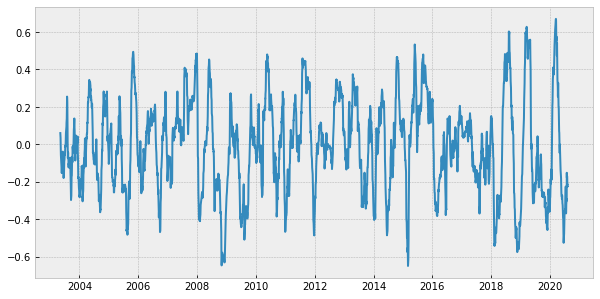

In [63]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax.plot(corr)
plt.show()

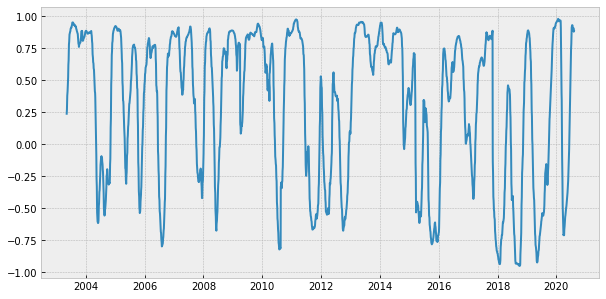

In [100]:
SPM = SP[['Date', 'med']]
SPM = SPM.set_index('Date')
SPMTRV = SPM[SPM.index > '2002-12-17']
SPMTRV = SPMTRV.join(TRV)
SPMTRV.TREAST = SPMTRV.TREAST.fillna(method='ffill')
corr = SPMTRV.med.rolling(window=100).corr(SPMTRV.TREAST)

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plt.plot(corr)
plt.show()

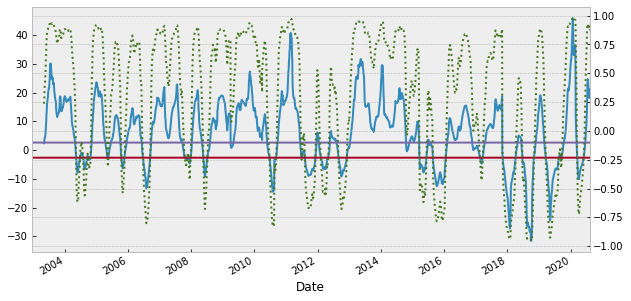

(-2.6269310948140245, 2.626931094814024)

In [101]:
t = corr * (100 - 2)**(1/2) / (1 - corr ** 2)**(1/2)

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plt.plot(t)

t1 = stats.t.ppf(0.01 / 2, df=100 - 2)
t2 = stats.t.ppf(1 - 0.01 / 2, df=100 - 2)

corrt = pd.DataFrame({'corr': corr, 't1': np.ones(len(t))*t1, 't2': np.ones(len(t))*t2})
plt.plot(corrt.t1)
plt.plot(corrt.t2)

corr.plot(secondary_y=True, linestyle=':')
plt.show()

t1, t2

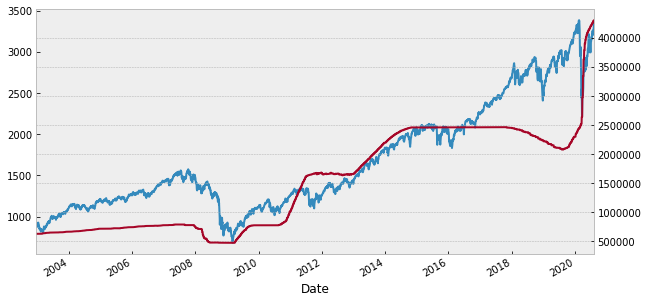

In [102]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
SPMTRV.med.plot()
SPMTRV.TREAST.plot(secondary_y=True)
plt.show()

In [76]:
RU = RU[RU.Date > '2000-12-31']
RU['medr'] = (RU.Open + RU.Close)/2
SPM = SP[['Date', 'med']]
RUM = RU[['Date', 'medr']]
SPM = SPM.set_index('Date')
SPM.index = pd.to_datetime(SPM.index)
RUM = RUM.set_index('Date')
RUM.index = pd.to_datetime(RUM.index)
SPMRUM = SPM.join(RUM)
SPMRUM.medr = SPMRUM.medr.fillna(method='ffill')


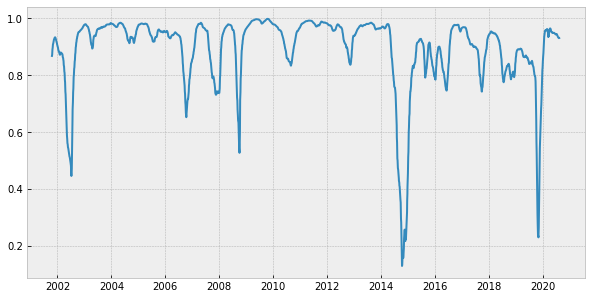

In [77]:
corr = SPMRUM.med.rolling(window=200).corr(SPMRUM.medr)
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plt.plot(corr)
plt.show()

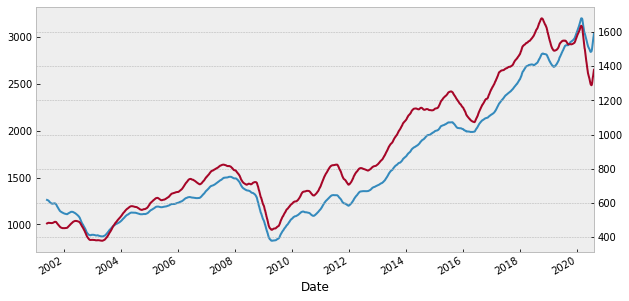

In [78]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
SPMRUM.med.rolling(window=100).mean().plot()
SPMRUM.medr.rolling(window=100).mean().plot(secondary_y=True)
plt.show()

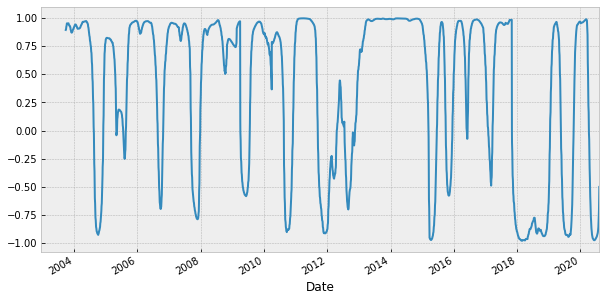

In [79]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
corr = SPMTRV.med.rolling(window=100).mean().rolling(window=100).corr(SPMTRV.TREAST)
corr.plot()

In [16]:
SP

,Date,Open,High,Low,Close,Adj Close,Volume,med
0,2001-01-02,1331.00,1336.75,1289.25,1300.00,1300.00,92668.0,1315.500
1,2001-01-03,1301.00,1367.25,1288.75,1359.00,1359.00,130684.0,1330.000
2,2001-01-04,1360.00,1365.50,1341.50,1349.00,1349.00,110846.0,1354.500
3,2001-01-05,1345.75,1380.00,1303.00,1304.00,1304.00,117776.0,1324.875
4,2001-01-08,1308.25,1312.50,1287.50,1309.50,1309.50,120010.0,1308.875
...,...,...,...,...,...,...,...,...
4975,2020-08-03,3272.00,3295.50,3254.75,3288.50,3288.50,1250449.0,3280.250
4976,2020-08-04,3290.75,3300.50,3271.00,3300.00,3300.00,1145269.0,3295.375
4977,2020-08-05,3300.75,3323.25,3292.00,3316.00,3316.00,1116787.0,3308.375
4978,2020-08-06,3317.00,3345.50,3300.50,3344.25,3344.25,1346665.0,3330.625
